# The Big Picture and Framing the Problem

# Data Collection

In [ ]:
import os
import pandas as pd

In [2]:
file_path = os.getcwd()

train_data = os.path.join(file_path, 'kaggle_housing/train.csv' )
train_df = pd.read_csv(train_data)

test_data = os.path.join(file_path, 'kaggle_housing/test.csv')
test_df = pd.read_csv(test_data)

# Data Exploration

## Types of Data

In [ ]:
import numpy as np

In [6]:
# Size of the Datasets - This is a fairly small dataset with only 1460 examples, 80 features, and 1 target variable
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [7]:
# Let's see what the data looks like - It's structured with many different data types 
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
# We can look at each of the columns/features, the number of non-null entries, and their data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# It's clear there is missing data - Let's see how many values are missing and from which features
train_df.isnull().sum()[(train_df.isnull().sum() > 0) == True]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
# It might help to look proportionally at how many values are missing 
train_df.isnull().sum()[(train_df.isnull().sum() > 0) == True] / train_df.shape[0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

Some of these features appear to be missing almost all of their values. However, reading through what each feature and it's classes represent in the data_description.txt, it's clear that NA was used to represent something being missing from the class. Pandas interpreted this to mean that the data itself was missing (NaN). So let's go ahead and convert these values to be "NO" rather than "NA". 

In [17]:
# These are the features that we know use NA, so I will only convert NaN values for them
# This still makes an assumption that any NaN value in these features was actually NA and not in fact missing
NA_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
              'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for feature in NA_features:
    train_df[feature] = train_df[feature].replace({np.nan: 'NO'})
for feature in NA_features:
    test_df[feature] = test_df[feature].replace({np.nan: 'NO'})

In [15]:
# Now we can see that there are far fewer missing values 
train_df.isnull().sum()[(train_df.isnull().sum() > 0) == True]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [16]:
test_df.isnull().sum()[(test_df.isnull().sum() > 0) == True]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64

In [18]:
# Check for duplicates
train_df.duplicated().sum()

0

In [19]:
# Get a sense for the values in each feature
for col in train_df.columns:
    print(col)
    print(train_df[col].value_counts())
    print("\n-----------\n")

Id
1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64

-----------

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

-----------

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

-----------

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

-----------

LotArea
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

-----------

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

-----------


### Immediate Notes and Concerns

Based on the description in data_description.txt, it's clear that there are classes that aren't represented by the data, as well as many classes that only have a few instances. This will make it impossible or difficult for the model to learn patterns about those classes. 

#### Id
A unique identifier for each house, therefore it does nothing for a model and can be removed. However, we need to save the Test IDs for the submission. 

In [21]:
train_id = train_df.pop('Id')
test_id = test_df.pop('Id')

In [22]:
train_df.shape, test_df.shape

((1460, 80), (1459, 79))

## Descriptive Statistics

We already looked at the measures of frequency with the above value counts and the missing value counts. 

We can also look at the measures of central tendency and spread for numerical features. The only value that could be obtained for categorical data is the mode, which we already got in the above value counts. 

In [23]:
# Hard to say much with this, we'll need to look at visualizations and narrow down to features that correlate 
# highly with the SalePrice
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
# We can look at the correlation measure of dependence for numerical features
train_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [25]:
# To just look at what correlated with the SalePrice
corr_matrix = train_df.corr()

corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [36]:
# Look at the ten features that correlate most strongly with SalePrice
top_ten = np.abs(corr_matrix['SalePrice']).sort_values(ascending=False)[:11].keys()
train_df[top_ten].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


It makes sense that overall quality would be the highest correlating feature with SalePrice, and the rest of the highly correlating features make sense as well. 

There are also some strong correlations between these features. For instance, GarageCars has a 0.88 correlation with GarageArea. High correlations between features can cause issues in some models, so it's possible some may need to be removed or combined. 

## Data Visualization

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

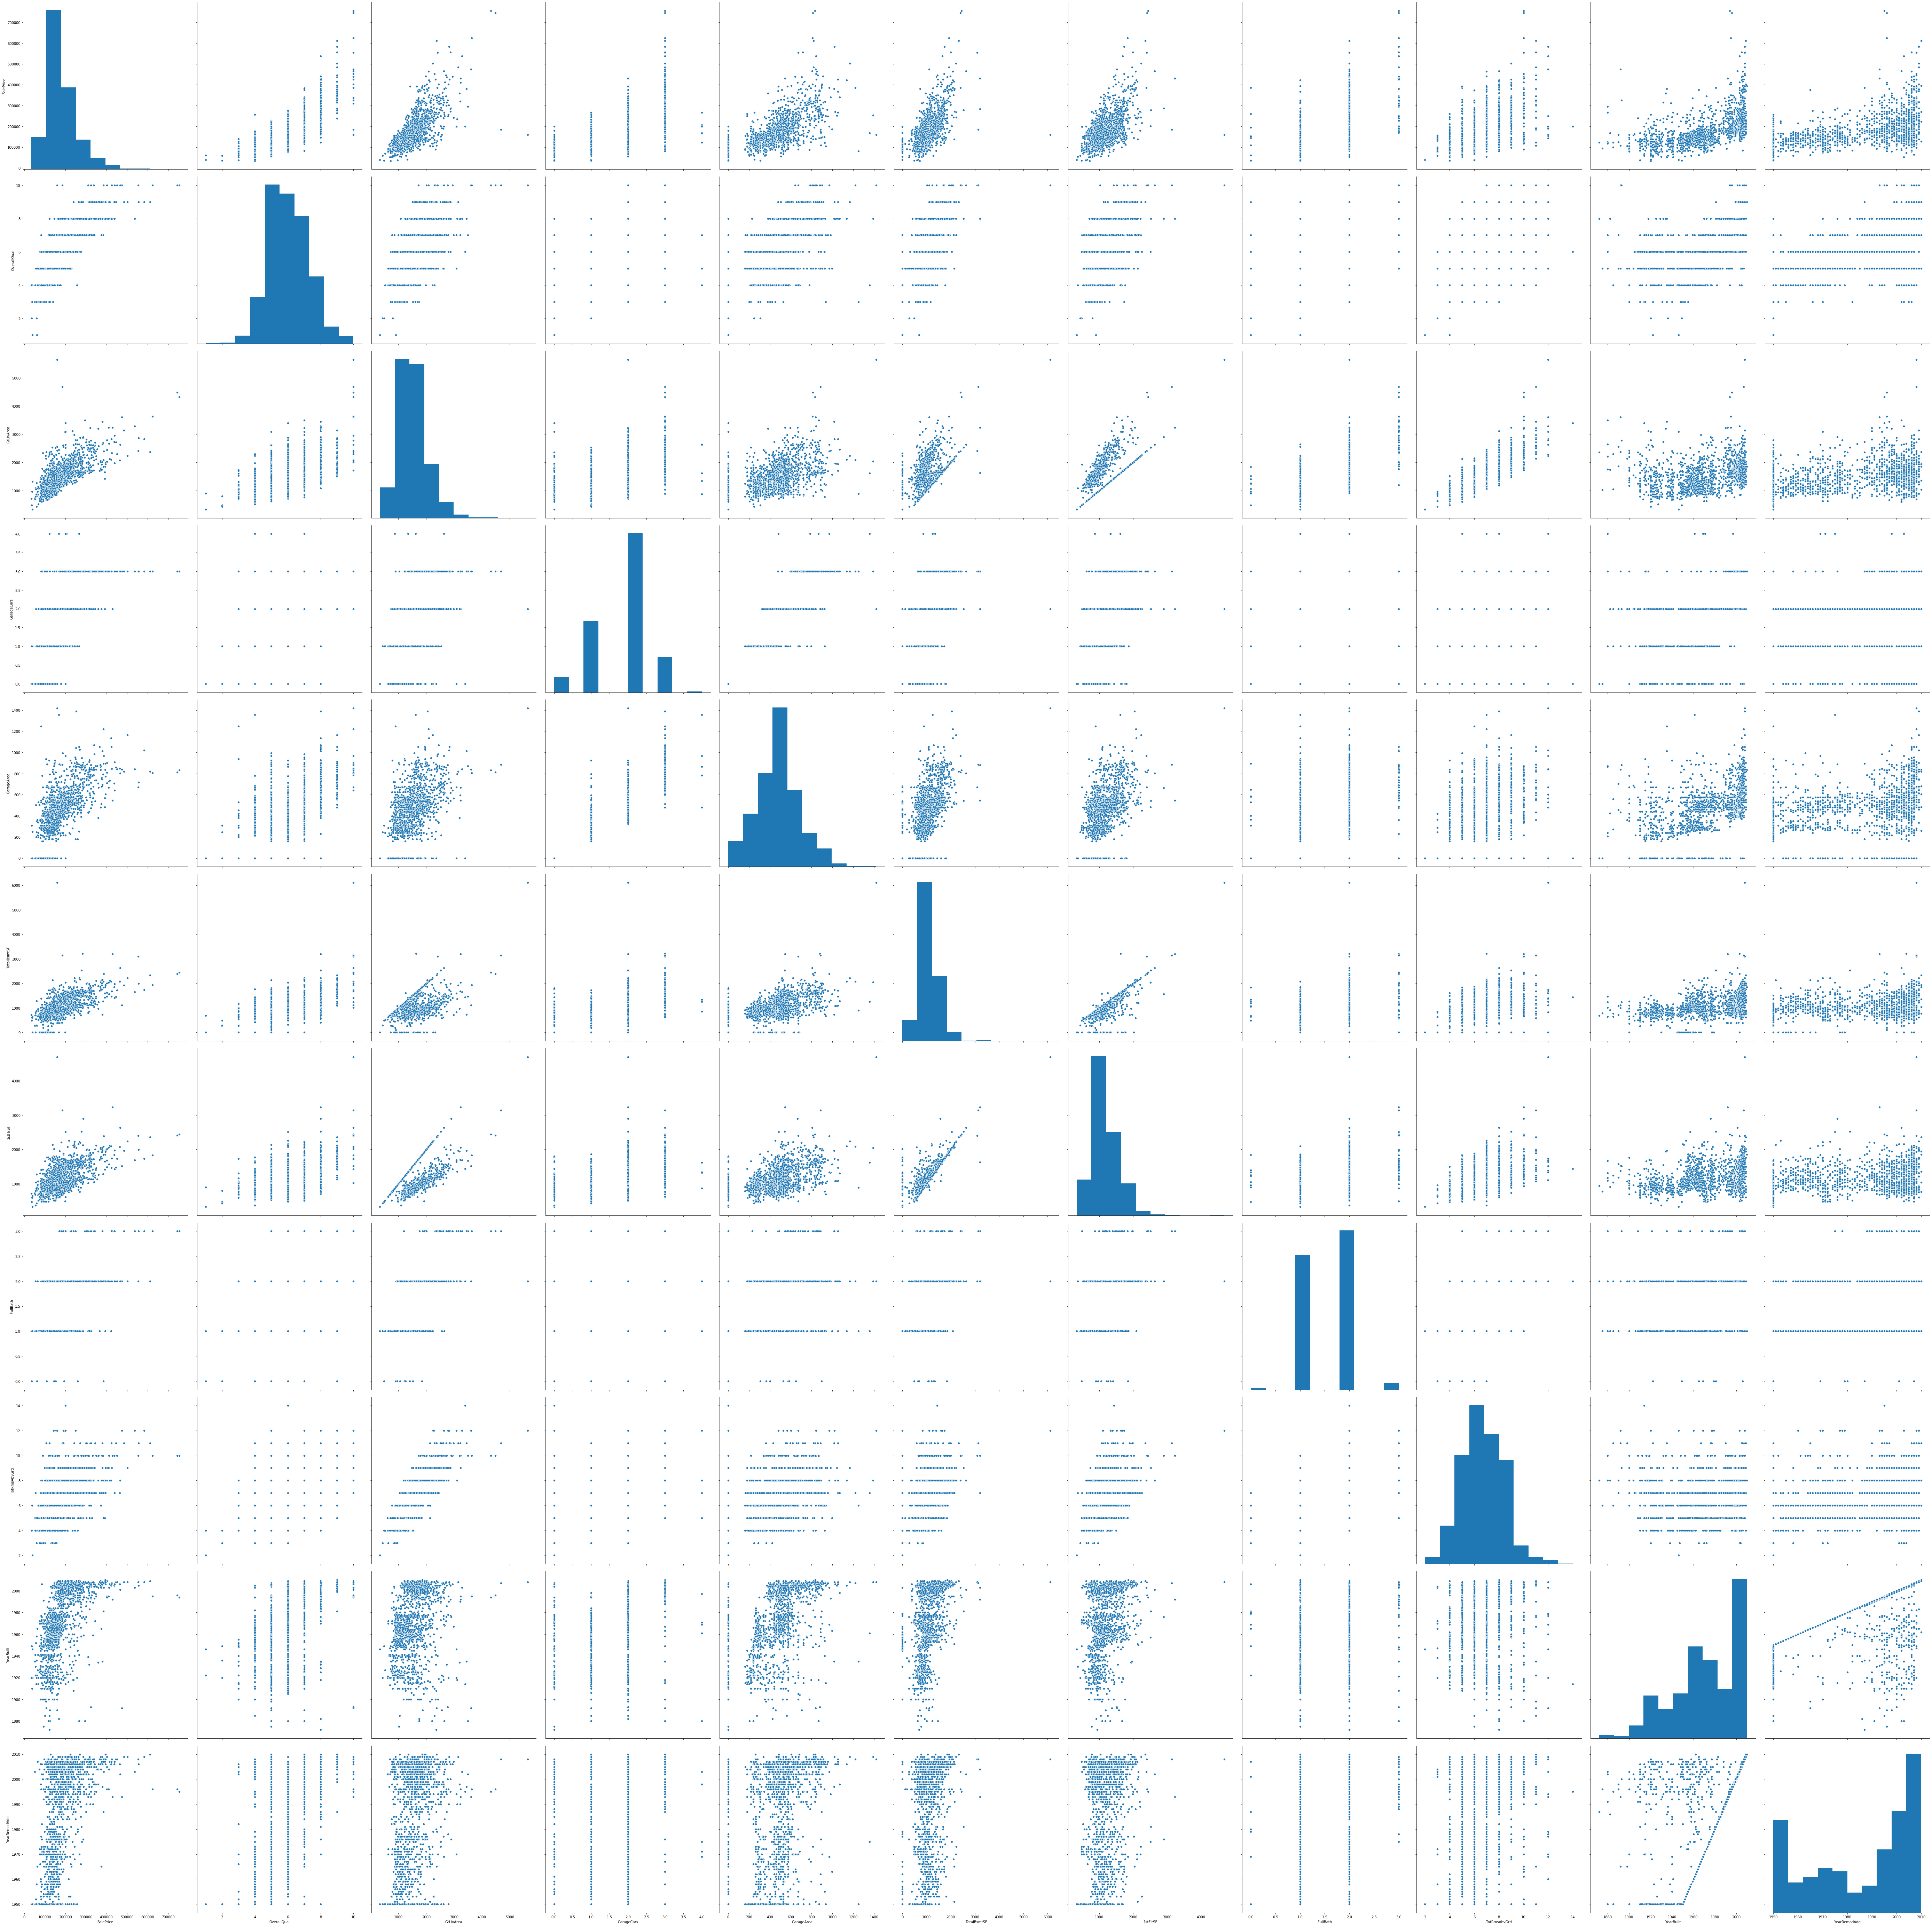

In [61]:
# To quickly look at the correlation matrix pairplot for the SalePrice and top correlated numerical features
sns.pairplot(train_df[top_ten], height = 7);

From even just these few we can see that SalePrice and a few others have some skew which may need to be transformed to have a more normal distribution. Additionally, it looks like there are some outliers in the data. 

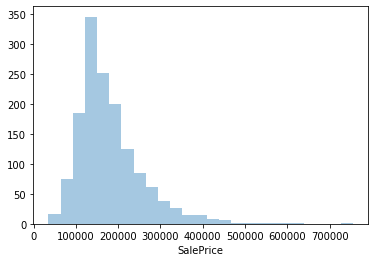

In [50]:
# Look specifically at the target variable - It's clearly left skewed, a log transformation may help
sns.distplot(train_df['SalePrice'], kde=False, bins=25);

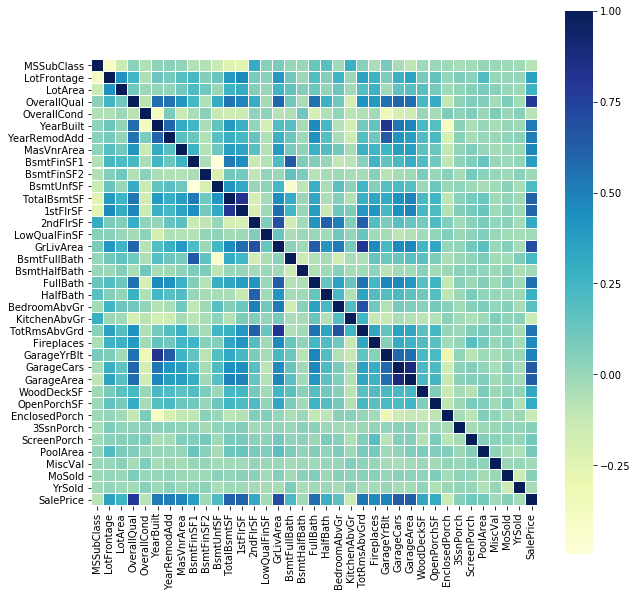

In [74]:
# Let's redo the correlation matrix, but this time as a heatmap
# This will only be for the numerical features
corr_matrix = train_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='YlGnBu', linewidth=0.05, linecolor='white', square=True);

In [ ]:
sns.countplot(x='MSZoning', data=train_df)

In [ ]:
sns.distplot(train_df['WoodDeckSF'], kde=False, bins=25)

### Additional Findings
    
MSSubClass
    - It's being treated as a numerical feature when it seems more like a categorical one. 
    
MSZoning
    - 
    


# Data Preprocessing

In [ ]:
# I'm just doing some simple non grouped imputation

In [ ]:
# MasVnrType - Missing 8 categorical values, so we can just do a simple mode imputation 
masvnrtype_mode = train_df['MasVnrType'].mode()
train_df['MasVnrType'].fillna(masvnrtype_mode[0], inplace=True)
test_df['MasVnrType'].fillna(masvnrtype_mode[0], inplace=True)

In [ ]:
# MasVnrArea - Missing 8 int values, so we can just do a simple mode imputation 
masvnrarea_mode = train_df['MasVnrArea'].mode()
train_df['MasVnrArea'].fillna(masvnrarea_mode[0], inplace=True)
test_df['MasVnrArea'].fillna(masvnrarea_mode[0], inplace=True)

In [ ]:
# Electrical - Missing 1 categorical value, mode imputation
electrical_mode = train_df['Electrical'].mode()
train_df['Electrical'].fillna(electrical_mode[0], inplace=True)
test_df['Electrical'].fillna(electrical_mode[0], inplace=True)

In [ ]:
# GarageYrBlt - Missing 81 int values, mode imputation for now
garageyrblt_mode = train_df['GarageYrBlt'].mode()
train_df['GarageYrBlt'].fillna(garageyrblt_mode[0], inplace=True)
test_df['GarageYrBlt'].fillna(garageyrblt_mode[0], inplace=True)

In [ ]:
# LotFrontage - Missing 259 int values, median imputation for now
lotfrontage_median = train_df['LotFrontage'].median()
train_df['LotFrontage'].fillna(lotfrontage_median, inplace=True)
test_df['LotFrontage'].fillna(lotfrontage_median, inplace=True)

In [ ]:
additional_modes = train_df.mode()
test_df['MSZoning'].fillna(additional_modes['MSZoning'][0], inplace=True)
test_df['Utilities'].fillna(additional_modes['Utilities'][0], inplace=True)
test_df['Exterior1st'].fillna(additional_modes['Exterior1st'][0], inplace=True)
test_df['Exterior2nd'].fillna(additional_modes['Exterior2nd'][0], inplace=True)
test_df['BsmtFinSF1'].fillna(additional_modes['BsmtFinSF1'][0], inplace=True)
test_df['BsmtFinSF2'].fillna(additional_modes['BsmtFinSF2'][0], inplace=True)
test_df['BsmtUnfSF'].fillna(additional_modes['BsmtUnfSF'][0], inplace=True)
test_df['TotalBsmtSF'].fillna(additional_modes['TotalBsmtSF'][0], inplace=True)
test_df['BsmtFullBath'].fillna(additional_modes['BsmtFullBath'][0], inplace=True)
test_df['BsmtHalfBath'].fillna(additional_modes['BsmtHalfBath'][0], inplace=True)
test_df['KitchenQual'].fillna(additional_modes['KitchenQual'][0], inplace=True)
test_df['Functional'].fillna(additional_modes['Functional'][0], inplace=True)
test_df['GarageCars'].fillna(additional_modes['GarageCars'][0], inplace=True)
test_df['GarageArea'].fillna(additional_modes['GarageArea'][0], inplace=True)
test_df['SaleType'].fillna(additional_modes['SaleType'][0], inplace=True)

In [ ]:
test_df.isnull().sum()[(test_df.isnull().sum() > 0) == True]

In [ ]:
train_df.shape, test_df.shape

In [ ]:
# MSSubClass is being treated as a numerical feature when really it is categorical 
train_df['MSSubClass'] = train_df['MSSubClass'].map({20:'20', 30:'30', 40:'40', 45:'45', 50:'50', 60:'60',
                                                    70:'70', 75:'75', 80:'80', 85:'85', 90:'90', 120:'120',
                                                    150:'150', 160:'160', 180:'180', 190:'190'})
test_df['MSSubClass'] = test_df['MSSubClass'].map({20:'20', 30:'30', 40:'40', 45:'45', 50:'50', 60:'60',
                                                    70:'70', 75:'75', 80:'80', 85:'85', 90:'90', 120:'120',
                                                    150:'150', 160:'160', 180:'180', 190:'190'})

In [ ]:
# Many of the categorical features would actually fit nicely as ordinal numerical features
# For instance, ExterQual has the classes: Ex, Gd, TA, Fa, Po, which would map nicely to 5, 4, 3, 2, 1

ratings_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                   'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
                   'GarageCond', 'PoolQC']
basement_finishes = ['BsmtFinType1', 'BsmtFinType2']

In [ ]:
# Remember that there are other features that include not having a basement - don't want to double up

In [ ]:
train_df['Basement'] = train_df['BsmtQual'] != 'NO'
test_df['Basement'] = test_df['BsmtQual'] != 'NO'

In [ ]:
train_df['Fireplace'] = train_df['FireplaceQu'] != 'NO'
test_df['Fireplace'] = test_df['FireplaceQu'] != 'NO'

In [ ]:
train_df['Garage'] = train_df['GarageQual'] != 'NO'
test_df['Garage'] = test_df['GarageQual'] != 'NO'

In [ ]:
train_df['Pool'] = train_df['PoolQC'] != 'NO'
test_df['Pool'] = test_df['PoolQC'] != 'NO'

In [ ]:
train_df.shape, test_df.shape

In [ ]:
# Now I'm assuming that not having something is equivalent to having an Average version
# The other thing is to make sure these features are true ordinal with "equal" spacing between values
for feature in ratings_features:
    train_df[feature] = train_df[feature].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po': 1, 'NO':3})
for feature in ratings_features:
    test_df[feature] = test_df[feature].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po': 1, 'NO':3})

In [ ]:
train_df['BsmtExposure'] = train_df['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NO':3})
test_df['BsmtExposure'] = test_df['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NO':3})

In [ ]:
for fin_type in basement_finishes:
    train_df[fin_type] = train_df[fin_type].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NO':5})

In [ ]:
train_df['GarageFinish'] = train_df['GarageFinish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NO':2})
test_df['GarageFinish'] = test_df['GarageFinish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NO':2})

In [ ]:
train_df.info()

In [ ]:
for feature in train_df:
    print(feature)
    print(train_df[feature].value_counts())
    print('_______________')

In [ ]:
# Since not all of the classes are represented in the training set, we need to tell Pandas that they exist
train_df['MSSubClass'] = pd.Categorical(train_df['MSSubClass'], categories=['20', '30', '40', '45', '50', '60',
                                                               '70', '75', '80', '85', '90', '120', '150', '160',
                                                               '180', '190'])
train_df['MSZoning'] = pd.Categorical(train_df['MSZoning'], categories=['A', 'C', 'FV', 'I', 'RH', 'RL',
                                                                        'RP', 'RM'])
train_df['Street'] = pd.Categorical(train_df['Street'], categories=['Grvl', 'Pave'])
train_df['Alley'] = pd.Categorical(train_df['Alley'], categories=['Grvl', 'Pave', 'NO'])
train_df['LotShape'] = pd.Categorical(train_df['LotShape'], categories=['Reg', 'IR1', 'IR2', 'IR3'])
train_df['LandContour'] = pd.Categorical(train_df['LandContour'], categories=['Lvl', 'Bnk', 'HLS', 'Low'])
train_df['Utilities'] = pd.Categorical(train_df['Utilities'], categories=['AllPub', 'NoSewr', 'NoSeWa', 'ELO'])
train_df['LotConfig'] = pd.Categorical(train_df['LotConfig'], categories=['Inside', 'Corner', 'CulDSac',
                                                                         'FR2', 'FR3'])
train_df['LandSlope'] = pd.Categorical(train_df['LandSlope'], categories=['Gtl', 'Mod', 'Sev'])
train_df['Neighborhood'] = pd.Categorical(train_df['Neighborhood'], categories=['Blmngtn', 'Blueste', 'BrDale',
                                                                                'BrkSide', 'ClearCr', 'CollgCr',
                                                                                'Crawfor', 'Edwards', 'Gilbert',
                                                                                'IDOTRR', 'MeadowV', 'Mitchel',
                                                                                'Names', 'NoRidge', 'NPkVill',
                                                                                'NridgHt', 'NWAmes', 'OldTown',
                                                                                'SWISU', 'Sawyer', 'SawyerW',
                                                                                'Somerst', 'StoneBr', 'Timber',
                                                                                'Veenker'])
train_df['Condition1'] = pd.Categorical(train_df['Condition1'], categories=['Artery', 'Feedr', 'Norm', 'RRNn', 
                                                                           'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])
train_df['Condition2'] = pd.Categorical(train_df['Condition2'], categories=['Artery', 'Feedr', 'Norm', 'RRNn', 
                                                                           'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])
train_df['BldgType'] = pd.Categorical(train_df['BldgType'], categories=['1Fam', '2FmCon', 'Duplx', 'TwnhsE',
                                                                        'TwnhsI'])
train_df['HouseStyle'] = pd.Categorical(train_df['HouseStyle'], categories=['1Story', '1.5Fin', '1.5Unf', '2Story',
                                                                           '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'])
train_df['RoofStyle'] = pd.Categorical(train_df['RoofStyle'], categories=['Flat', 'Gable', 'Gambrel', 'Hip',
                                                                         'Mansard', 'Shed'])
train_df['RoofMatl'] = pd.Categorical(train_df['RoofMatl'], categories=['ClyTile', 'CompShg', 'Membran', 'Metal',
                                                                       'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'])
train_df['Exterior1st'] = pd.Categorical(train_df['Exterior1st'], categories=['AsbShng', 'AsphShn', 'BrkComm',
                                                                             'BrkFace','CBlock', 'CemntBd', 
                                                                              'HdBoard','ImStucc', 'MetalSd', 
                                                                              'Other','Plywood', 'PreCast', 
                                                                              'Stone','Stucco', 'VinylSd', 
                                                                              'Wd Sdng', 'WdShing'])
train_df['Exterior2nd'] = pd.Categorical(train_df['Exterior2nd'], categories=['AsbShng', 'AsphShn', 'BrkComm',
                                                                             'BrkFace','CBlock', 'CemntBd', 
                                                                              'HdBoard','ImStucc', 'MetalSd', 
                                                                              'Other','Plywood', 'PreCast', 
                                                                              'Stone','Stucco', 'VinylSd', 
                                                                              'Wd Sdng', 'WdShing'])
train_df['MasVnrType'] = pd.Categorical(train_df['MasVnrType'], categories=['BrkCmn', 'BrkFace', 'CBlock',
                                                                           'None', 'Stone'])
train_df['Foundation'] = pd.Categorical(train_df['Foundation'], categories=['BrkTil', 'CBlock', 'PConc', 'Slab',
                                                                           'Stone', 'Wood'])
train_df['BsmtFinType1'] = pd.Categorical(train_df['BsmtFinType1'], categories=['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ',
                                                                               'Unf', 'NO'])
train_df['BsmtFinType2'] = pd.Categorical(train_df['BsmtFinType2'], categories=['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ',
                                                                               'Unf', 'NO'])
train_df['Heating'] = pd.Categorical(train_df['Heating'], categories=['Floor', 'GasA', 'GasW', 'Grav', 'OthW',
                                                                     'Wall'])
train_df['CentralAir'] = pd.Categorical(train_df['CentralAir'], categories=['N', 'Y'])
train_df['Electrical'] = pd.Categorical(train_df['Electrical'], categories=['SBrkr', 'FuseA', 'FuseF', 'FuseP',
                                                                           'Mix'])
train_df['Functional'] = pd.Categorical(train_df['Functional'], categories=['Typ', 'Min1', 'Min2', 'Mod', 'Maj1',
                                                                           'Maj2', 'Sev', 'Sal'])
train_df['GarageType'] = pd.Categorical(train_df['GarageType'], categories=['2Types', 'Attchd', 'Basment', 
                                                                           'BuiltIn', 'CarPort', 'Detchd', 'NO'])
train_df['PavedDrive'] = pd.Categorical(train_df['PavedDrive'], categories=['Y', 'P', 'N'])
train_df['Fence'] = pd.Categorical(train_df['Fence'], categories=['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NO'])
train_df['MiscFeature'] = pd.Categorical(train_df['MiscFeature'], categories=['Elev', 'Gar2', 'Othr', 'Shed',
                                                                             'TenC', 'NO'])
train_df['SaleType'] = pd.Categorical(train_df['SaleType'], categories=['WD', 'CWD', 'VWD', 'New', 'COD', 'Con',
                                                                       'ConLw', 'ConLI', 'ConLD', 'Oth'])
train_df['SaleCondition'] = pd.Categorical(train_df['SaleCondition'], categories=['Normal', 'Abnorml', 'AdjLand',
                                                                                 'Alloca', 'Family', 'Partial'])

In [ ]:
test_df['MSSubClass'] = pd.Categorical(test_df['MSSubClass'], categories=['20', '30', '40', '45', '50', '60',
                                                               '70', '75', '80', '85', '90', '120', '150', '160',
                                                               '180', '190'])
test_df['MSZoning'] = pd.Categorical(test_df['MSZoning'], categories=['A', 'C', 'FV', 'I', 'RH', 'RL',
                                                                        'RP', 'RM'])
test_df['Street'] = pd.Categorical(test_df['Street'], categories=['Grvl', 'Pave'])
test_df['Alley'] = pd.Categorical(test_df['Alley'], categories=['Grvl', 'Pave', 'NO'])
test_df['LotShape'] = pd.Categorical(test_df['LotShape'], categories=['Reg', 'IR1', 'IR2', 'IR3'])
test_df['LandContour'] = pd.Categorical(test_df['LandContour'], categories=['Lvl', 'Bnk', 'HLS', 'Low'])
test_df['Utilities'] = pd.Categorical(test_df['Utilities'], categories=['AllPub', 'NoSewr', 'NoSeWa', 'ELO'])
test_df['LotConfig'] = pd.Categorical(test_df['LotConfig'], categories=['Inside', 'Corner', 'CulDSac',
                                                                         'FR2', 'FR3'])
test_df['LandSlope'] = pd.Categorical(test_df['LandSlope'], categories=['Gtl', 'Mod', 'Sev'])
test_df['Neighborhood'] = pd.Categorical(test_df['Neighborhood'], categories=['Blmngtn', 'Blueste', 'BrDale',
                                                                                'BrkSide', 'ClearCr', 'CollgCr',
                                                                                'Crawfor', 'Edwards', 'Gilbert',
                                                                                'IDOTRR', 'MeadowV', 'Mitchel',
                                                                                'Names', 'NoRidge', 'NPkVill',
                                                                                'NridgHt', 'NWAmes', 'OldTown',
                                                                                'SWISU', 'Sawyer', 'SawyerW',
                                                                                'Somerst', 'StoneBr', 'Timber',
                                                                                'Veenker'])
test_df['Condition1'] = pd.Categorical(test_df['Condition1'], categories=['Artery', 'Feedr', 'Norm', 'RRNn', 
                                                                           'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])
test_df['Condition2'] = pd.Categorical(test_df['Condition2'], categories=['Artery', 'Feedr', 'Norm', 'RRNn', 
                                                                           'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])
test_df['BldgType'] = pd.Categorical(test_df['BldgType'], categories=['1Fam', '2FmCon', 'Duplx', 'TwnhsE',
                                                                        'TwnhsI'])
test_df['HouseStyle'] = pd.Categorical(test_df['HouseStyle'], categories=['1Story', '1.5Fin', '1.5Unf', '2Story',
                                                                           '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'])
test_df['RoofStyle'] = pd.Categorical(test_df['RoofStyle'], categories=['Flat', 'Gable', 'Gambrel', 'Hip',
                                                                         'Mansard', 'Shed'])
test_df['RoofMatl'] = pd.Categorical(test_df['RoofMatl'], categories=['ClyTile', 'CompShg', 'Membran', 'Metal',
                                                                       'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'])
test_df['Exterior1st'] = pd.Categorical(test_df['Exterior1st'], categories=['AsbShng', 'AsphShn', 'BrkComm',
                                                                             'BrkFace','CBlock', 'CemntBd', 
                                                                              'HdBoard','ImStucc', 'MetalSd', 
                                                                              'Other','Plywood', 'PreCast', 
                                                                              'Stone','Stucco', 'VinylSd', 
                                                                              'Wd Sdng', 'WdShing'])
test_df['Exterior2nd'] = pd.Categorical(test_df['Exterior2nd'], categories=['AsbShng', 'AsphShn', 'BrkComm',
                                                                             'BrkFace','CBlock', 'CemntBd', 
                                                                              'HdBoard','ImStucc', 'MetalSd', 
                                                                              'Other','Plywood', 'PreCast', 
                                                                              'Stone','Stucco', 'VinylSd', 
                                                                              'Wd Sdng', 'WdShing'])
test_df['MasVnrType'] = pd.Categorical(test_df['MasVnrType'], categories=['BrkCmn', 'BrkFace', 'CBlock',
                                                                           'None', 'Stone'])
test_df['Foundation'] = pd.Categorical(test_df['Foundation'], categories=['BrkTil', 'CBlock', 'PConc', 'Slab',
                                                                           'Stone', 'Wood'])
test_df['BsmtFinType1'] = pd.Categorical(test_df['BsmtFinType1'], categories=['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ',
                                                                               'Unf', 'NO'])
test_df['BsmtFinType2'] = pd.Categorical(test_df['BsmtFinType2'], categories=['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ',
                                                                               'Unf', 'NO'])
test_df['Heating'] = pd.Categorical(test_df['Heating'], categories=['Floor', 'GasA', 'GasW', 'Grav', 'OthW',
                                                                     'Wall'])
test_df['CentralAir'] = pd.Categorical(test_df['CentralAir'], categories=['N', 'Y'])
test_df['Electrical'] = pd.Categorical(test_df['Electrical'], categories=['SBrkr', 'FuseA', 'FuseF', 'FuseP',
                                                                           'Mix'])
test_df['Functional'] = pd.Categorical(test_df['Functional'], categories=['Typ', 'Min1', 'Min2', 'Mod', 'Maj1',
                                                                           'Maj2', 'Sev', 'Sal'])
test_df['GarageType'] = pd.Categorical(test_df['GarageType'], categories=['2Types', 'Attchd', 'Basment', 
                                                                           'BuiltIn', 'CarPort', 'Detchd', 'NO'])
test_df['PavedDrive'] = pd.Categorical(test_df['PavedDrive'], categories=['Y', 'P', 'N'])
test_df['Fence'] = pd.Categorical(test_df['Fence'], categories=['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NO'])
test_df['MiscFeature'] = pd.Categorical(test_df['MiscFeature'], categories=['Elev', 'Gar2', 'Othr', 'Shed',
                                                                             'TenC', 'NO'])
test_df['SaleType'] = pd.Categorical(test_df['SaleType'], categories=['WD', 'CWD', 'VWD', 'New', 'COD', 'Con',
                                                                       'ConLw', 'ConLI', 'ConLD', 'Oth'])
test_df['SaleCondition'] = pd.Categorical(test_df['SaleCondition'], categories=['Normal', 'Abnorml', 'AdjLand',
                                                                                 'Alloca', 'Family', 'Partial'])

In [ ]:
total_train_df = pd.get_dummies(train_df)
total_test_df = pd.get_dummies(test_df)

In [ ]:
# We already made features for the NO groups
total_train_df.drop(columns=['BsmtFinType1_NO', 'BsmtFinType2_NO', 'GarageType_NO'], inplace=True)
total_test_df.drop(columns=['BsmtFinType1_NO', 'BsmtFinType2_NO', 'GarageType_NO'], inplace=True)

In [298]:
total_train_df.shape

(1460, 285)

In [299]:
total_test_df.shape

(1459, 284)

In [312]:
corr_matrix = total_train_df.corr()

low_corr = []
for value in range(total_train_df.shape[1]):
    if corr_matrix['SalePrice'][value] < 0.10 and corr_matrix['SalePrice'][value] > -0.10:
        low_corr.append(corr_matrix['SalePrice'].index[value])

In [313]:
high_corr_train = total_train_df.drop(columns=low_corr)
high_corr_test = total_test_df.drop(columns=low_corr)

In [332]:
# So many binary features that are sparse
# I should either remove them or use PCA
sparse_features = []
for feature in high_corr_train:
    values = high_corr_train[feature].value_counts().values
    for value in values:
        if value > (1460 * .9):
            sparse_features.append(feature)

In [333]:
len(sparse_features)

206

In [334]:
final_train = high_corr_train.drop(columns=sparse_features)
final_test = high_corr_test.drop(columns=sparse_features)

In [337]:
final_train.shape, final_test.shape

((1460, 49), (1459, 48))

In [ ]:
target = final_train['SalePrice']
features = final_train.drop(columns=['SalePrice'])

In [339]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

In [340]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1314, 48), (146, 48), (1314,), (146,))

In [341]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Selection

# Training | Tuning | Metrics

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)

LinearRegression()

In [242]:
lin_pred = lin_reg.predict(x_test_scaled)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_msle = mean_squared_log_error(y_test, lin_pred)
lin_rmsle = np.sqrt(lin_msle)
print(f"Linear RMSE: {lin_rmse}\nLinear RMSLE: {lin_rmsle}")

Linear RMSE: 36617.94656890233
Linear RMSLE: 0.15798920215927148


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(x_train_scaled, y_train)

In [ ]:
sgd_pred = sgd_reg.predict(x_test_scaled)
sgd_mse = mean_squared_error(y_test, sgd_pred)
sgd_rmse = np.sqrt(sgd_mse)
sgd_msle = mean_squared_log_error(y_test, sgd_pred)
sgd_rmsle = np.sqrt(sgd_msle)
print(f"SGD RMSE: {sgd_rmse}\nSGD RMSLE: {sgd_rmsle}")

In [291]:
from sklearn.svm import SVR

svm_reg = SVR()

In [292]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [40.0, 45.0, 50.0],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.0000001],
    'coef0': [0.0],
    'tol': [1e-4]
}

svm_grid = GridSearchCV(svm_reg, param_grid, cv=10, scoring='neg_mean_squared_log_error', verbose=1)
svm_grid.fit(x_train_scaled, y_train)
print(svm_grid.best_params_, svm_grid.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'C': 50.0, 'coef0': 0.0, 'gamma': 1e-07, 'kernel': 'linear', 'tol': 0.0001} -0.020026142152335336


In [293]:
svm_best = svm_grid.best_estimator_

In [294]:
svm_pred = svm_best.predict(x_test_scaled)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_rmse = np.sqrt(svm_mse)
svm_msle = mean_squared_log_error(y_test, svm_pred)
svm_rmsle = np.sqrt(svm_msle)
print(f"SVM RMSE: {svm_rmse}\nSVM RMSLE: {svm_rmsle}")

SVM RMSE: 41514.06900116566
SVM RMSLE: 0.14099211452433524


In [342]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

In [343]:
param_grid = {
    "n_estimators": [200],
    "criterion": ["mse"],
    "max_depth": [20, 30],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto"]
}

forest_grid = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_log_error', verbose=1)
forest_grid.fit(x_train_scaled, y_train)

print(forest_grid.best_params_, forest_grid.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'criterion': 'mse', 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200} -0.0224338703512575


In [344]:
forest_best = forest_grid.best_estimator_

In [345]:
rf_pred = forest_best.predict(x_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_msle = mean_squared_log_error(y_test, rf_pred)
rf_rmsle = np.sqrt(rf_msle)
print(f"Random Forest RMSE: {rf_rmse}\nRandom Forest RMSLE: {rf_rmsle}")

Random Forest RMSE: 31360.76857076346
Random Forest RMSLE: 0.13847882737287912


In [284]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()

In [285]:
param_grid = {
    'alpha': [0.5, 0.75, 1.0],
    'max_iter': [10000],
    'tol': [1e-4]
}

lasso_grid = GridSearchCV(lasso_reg, param_grid, cv=10, scoring='neg_mean_squared_log_error', verbose=1)
lasso_grid.fit(x_train_scaled, y_train)

print(lasso_grid.best_params_, lasso_grid.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'alpha': 1.0, 'max_iter': 10000, 'tol': 0.0001} -0.0359316868449455


In [286]:
lasso_best = lasso_grid.best_estimator_

In [287]:
lasso_pred = lasso_best.predict(x_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmle = mean_squared_log_error(y_test, lasso_pred)
lasso_rmsle = np.sqrt(lasso_rmle)
print(f"Random Forest RMSE: {lasso_rmse}\nRandom Forest RMSLE: {lasso_rmsle}")

Random Forest RMSE: 36618.27508299916
Random Forest RMSLE: 0.15791225437131534


# Present | Launch | Maintain

In [346]:
final_pred = forest_best.predict(high_corr_dense_test)

In [347]:
final = pd.concat([test_id, pd.Series(final_pred, name='SalePrice')], axis=1)

In [348]:
final.to_csv('kaggle_housing/final.csv', index=False)